In [1]:
import numpy as np 
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

## Quora

In [2]:
quora = pd.read_csv('quora/train.csv')

In [3]:
quora_qs = pd.Series(quora['question1'].tolist() + quora['question2'].tolist()).astype(str)
quora_qs_length = quora_qs.apply(lambda x: len(x.split(' ')))

## Wiki

In [4]:
wiki = pd.read_csv('wiki/train.csv')

In [5]:
wiki_qs = pd.Series(wiki['question1'].tolist() + wiki['question2'].tolist()).astype(str)
wiki_qs_length = wiki_qs.apply(lambda x: len(x.split(' ')))

## Comparison

In [6]:
print('Quora: Total number of question pairs is {}'.format(len(quora)))
print('Wiki: Total number of question pairs is {}'.format(len(wiki)))

Quora: Total number of question pairs is 404290
Wiki: Total number of question pairs is 799137


In [7]:
print('Quora: Duplicate question pairs rate is {}'.format(quora['is_duplicate'].mean()))
print('Wiki: Duplicate question pairs rate is {}'.format(wiki['is_duplicate'].mean()))

Quora: Duplicate question pairs rate is 0.369197853026293
Wiki: Duplicate question pairs rate is 0.0990280765375649


In [8]:
print('Quora: Duplicate question rate is {}'.format(1 - len(np.unique(quora_qs))/len(quora_qs)))
print('Wiki: Duplicate question rate is {}'.format(1 - len(np.unique(wiki_qs))/len(wiki_qs)))

Quora: Duplicate question rate is 0.33542630290138264
Wiki: Duplicate question rate is 0.20031796800798862


In [19]:
quora_words = set()
quora_words_num = 0
for q in quora_qs:
    for w in q:
        quora_words.add(w)
        quora_words_num += 1
print('Quora: Ratio of unique words in total words is {}'.format(len(quora_words)/quora_words_num))
wiki_words = set()
wiki_words_num = 0
for q in wiki_qs:
    for w in q:
        wiki_words.add(w)
        wiki_words_num += 1
print('Wiki: Ratio of unique words in total words is {}'.format(len(wiki_words)/wiki_words_num))

Quora: Ratio of unique words in total words is 2.7578327618789613e-05
Wiki: Ratio of unique words in total words is 8.727357803293084e-06


Quora: mean 11.06 std 5.89 Wiki: mean 10.37 std 25.40


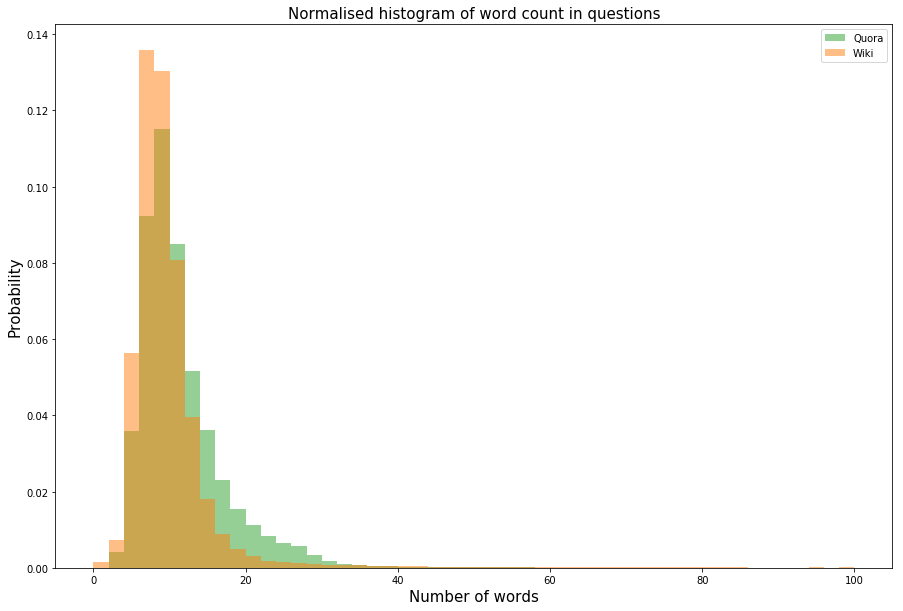

In [20]:
plt.figure(figsize=(15, 10))
plt.hist(quora_qs_length, bins=50, range=[0, 100], color=pal[2], density=True, alpha=0.5, label='Quora')
plt.hist(wiki_qs_length, bins=50, range=[0, 100], color=pal[1], density=True, alpha=0.5, label='Wiki')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('Quora: mean {:.2f} std {:.2f} Wiki: mean {:.2f} std {:.2f}'.format(quora_qs_length.mean(), quora_qs_length.std(), wiki_qs_length.mean(), wiki_qs_length.std()))
plt.savefig('word_count_in_questions')

In [10]:
from nltk.corpus import stopwords

def word_match_share_en(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

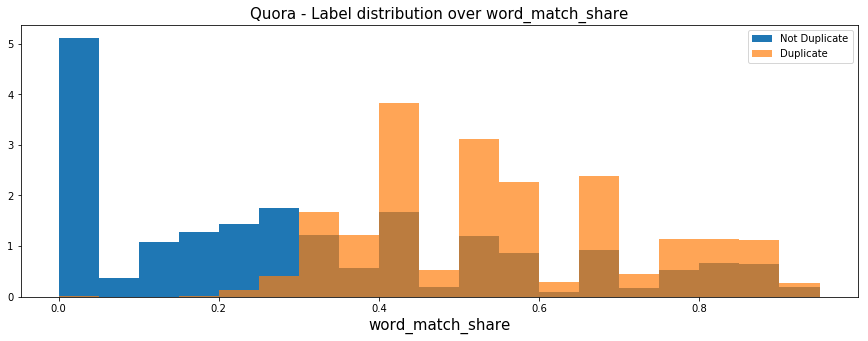

In [13]:
# For Quora dataset
stops = set(stopwords.words("english"))

plt.figure(figsize=(15, 5))
quora_word_share = quora.apply(word_match_share_en, axis=1, raw=True)
plt.hist(quora_word_share[quora['is_duplicate'] == 0], np.arange(0,1,0.05), density=True, label='Not Duplicate')
plt.hist(quora_word_share[quora['is_duplicate'] == 1], np.arange(0,1,0.05), density=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Quora - Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)
plt.savefig('quora-label-distribution')

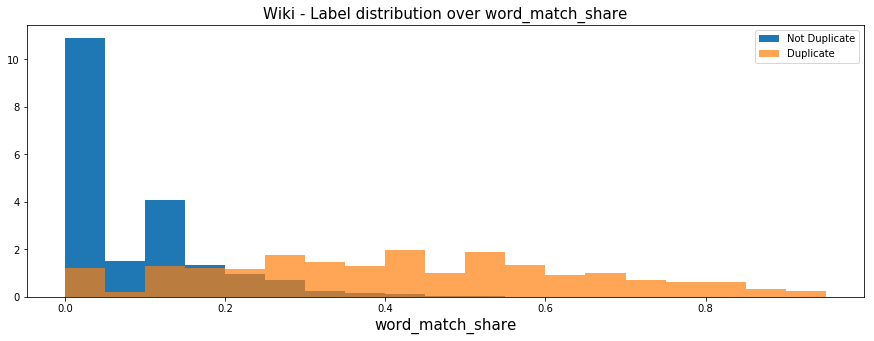

In [12]:
# For Wiki dataset
stops = set(stopwords.words("english"))

plt.figure(figsize=(15, 5))
wiki_word_share = wiki.apply(word_match_share_en, axis=1, raw=True)
plt.hist(wiki_word_share[wiki['is_duplicate'] == 0], bins=np.arange(0,1,0.05), density=True, label='Not Duplicate')
plt.hist(wiki_word_share[wiki['is_duplicate'] == 1], bins=np.arange(0,1,0.05), density=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Wiki - Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)
plt.savefig('wiki-label-distribution')